In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(10)

In [10]:
class KMeans:
    
    def __init__(self, X, num_clusters = 3):
        self.k = num_clusters
        self.max_iter = 100
        self.num_examples, self.num_features = X.shape
    
    def init_random_centroids(self, X):
        centroids = np.zeros((self.k, self.num_features))
        for k in range(self.k):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid
        return centroids
    
    def create_clusters(self, X, centroids):
        clusters = [[] for k in range(self.k)]
        for idx, point in enumerate(X):
            ## Numpy Broadcasting -> each row is being substracted.
            ## Then, we'll sum over columns.
            ## np.argmin gives index of minimum element.
            closest_centroid = np.argmin(np.sqrt( np.sum( (point - centroids)**2, axis =1 ) ))
            clusters[closest_centroid].append(idx)
        return clusters
    
    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.k, self.num_features))
        for idx, cluster in enumerate(clusters):
            ## Axis =0 -> over rows
            ## cluster = index of datapoints that belong to this cluster.
            new_centroid = np.mean(X[cluster], axis = 0)
            centroids[idx] = new_centroid
        return centroids
    
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    def fit(self, X, y):
        centroids = self.init_random_centroids(X)
        for iter_ in range(self.max_iter):
            clusters = self.create_clusters(X, centroids)
            new_centroids = self.calculate_new_centroids(clusters, X)
            diff = new_centroids - centroids
            centroids = new_centroids
            if not diff.any():
                print("Model Trained Successfully")
                break
        y_pred = self.predict_cluster(clusters, X)
        return y_pred

In [18]:
num_centers = 8
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = num_centers)
km = KMeans(X, num_centers)
y_pred = km.fit(X, y)

Model Trained Successfully


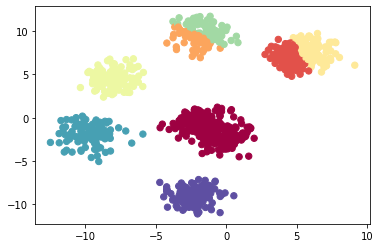

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap = plt.cm.Spectral)
plt.show()